# Лабораторная работа 1
## Логистическое отображение (Easy, Normal, Hard)

**Студент:** Шульга Никита Дмитриевич  
**Группа:** J3113  
**ИСУ:** 505250  
**Вариант:** 0

В работе рассматриваются три уровня заданий (Easy, Normal и Hard)

# Уровень Easy  
ИСУ: 505250 (вариант N = 0)

В этой части:
- логистическое отображение $x_{n+1} = r\,x_n(1 - x_n)$;
- доказательство, что при $r \in (0, 1]$ и $0 < x_0 < 1$ все $x_n$ остаются в интервале $(0, 1)$;
- графики зависимости $x_n$ от $x_{n-1}$ для разных значений $r$;
- то же самое для моей функции $g(x_n)$ и сравнение с логистическим отображением.

## Доказательство свойства при $r \in (0, 1]$

Рассматриваем логистическое отображение:
$$
x_{n+1} = r\,x_n(1 - x_n),
$$
где $r \in (0,1]$, а $0 < x_0 < 1$.

Пусть на некотором шаге уже выполнено $0 < x_n < 1$. Тогда:

- выражение $1 - x_n$ тоже лежит в интервале $(0,1)$;
- произведение $x_n(1 - x_n)$ остаётся внутри $(0,1)$;
- умножение на $r \in (0,1]$ сохраняет результат внутри $(0,1)$.

Следовательно,
$$
0 < x_{n+1} < 1.
$$

Так как $x_0$ также лежит в $(0, 1)$, то логистическое отображение не выводит значения за этот интервал, и все $x_n$ остаются в $(0,1)$.

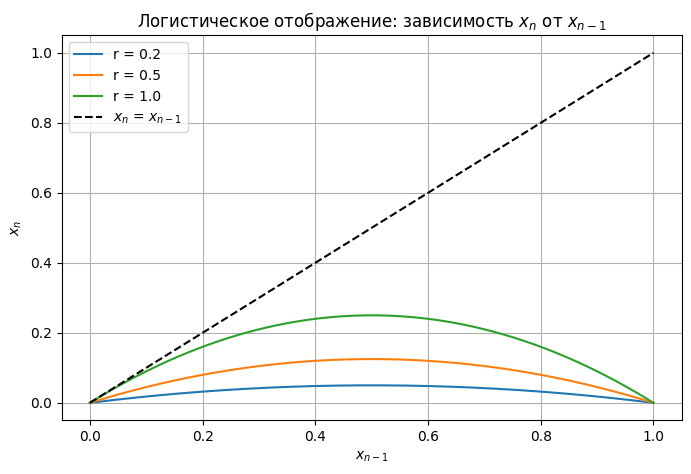

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x, r):
    return r * x * (1 - x)

x_prev = np.linspace(0, 1, 400)

r_values = [0.2, 0.5, 1.0]

plt.figure(figsize=(8, 5))

for r in r_values:
    x_curr = logistic(x_prev, r)
    plt.plot(x_prev, x_curr, label=f"r = {r}")

plt.plot(x_prev, x_prev, '--', color='black', label='$x_n$ = $x_{n-1}$')

plt.title("Логистическое отображение: зависимость $x_n$ от $x_{n-1}$")
plt.xlabel("$x_{n-1}$")
plt.ylabel("$x_n$")
plt.grid(True)
plt.legend()
plt.show()

### Вывод о влиянии параметра $r$

По графикам зависимости $x_n, (x_{n-1})$ видно:

- при малых значениях $r$ кривая низкая и изменяется слабо;
- при увеличении $r$ график поднимается и становится круче.

Параметр $r$ отвечает за интенсивность изменения отображения:
чем больше $r$ (в пределах $(0,1]$), тем сильнее меняется $x_n$ при тех же $x_{n-1}$.

## 1. Функция $g(x_n)$ для моего варианта (N = 0)

По условию вариант 0 задаётся формулой:
$$
x_{n+1} = r\,x_n(1 - x_n)(2 + x_n).
$$
(подставил формулу в рекурсию вида $x_{n+1} = g(x_{n}$) чтобы получить само отображение)
Введём обозначение:
$$
g(x) = r\,x(1 - x)(2 + x),
$$
тогда отображение принимает стандартный вид:
$$
x_{n+1} = g(x_n).
$$

Для графиков выбираем несколько значений $r$ из допустимого диапазона, который указан в условии

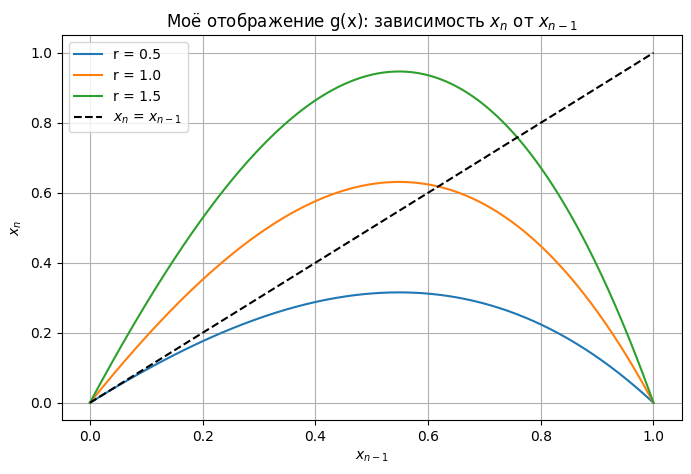

In [61]:
def g_my(x, r):
    return r * x * (1 - x) * (2 + x)

xs = np.linspace(0, 1, 400)
r_values_g = [0.5, 1.0, 1.5]

plt.figure(figsize=(8, 5))

for r in r_values_g:
    x_next = g_my(xs, r)
    plt.plot(xs, x_next, label=f"r = {r}")

plt.plot(xs, xs, '--', color='black', label='$x_n$ = $x_{n-1}$')

plt.title("Моё отображение g(x): зависимость $x_n$ от $x_{n-1}$")
plt.xlabel("$x_{n-1}$")
plt.ylabel("$x_n$")
plt.grid(True)
plt.legend()
plt.show()

### Сравнение логистического отображения и функции $g(x)$

**Сходства:**
- формы графиков похожи: есть подъём в середине и спад по краям;
- в обеих функциях присутствует общий множитель $x(1 - x)$.

**Различия:**
- графики $g(x)$ выше при тех же значениях $r$;
- влияние больших значений $x$ усиливается.

**Причина различий:**
в формуле варианта присутствует дополнительный множитель $(2 + x)$,
который делает отображение "сильнее" и приводит к более высоким значениям $x_{n+1}$.

Таким образом, $g(x)$ ведёт себя агрессивнее, хотя общая структура остаётся похожей на логистическую.

# Уровень Normal

В этой части:
- нахожу неподвижные точки логистического отображения;
- разбираюсь, при каких $r$ точек одна или две, и почему больше быть не может;
- доказываю монотонное убывание последовательности при $r \in (0,1]$ и существование предела;
- анализирую подпоследовательности $\{x_{2n}\}$ и $\{x_{2n+1}\}$ при $r \in (2,3)$;
- выполняю аналогичные шаги для отображения $g(x_n)$ моего варианта.


## 1. Неподвижные точки логистического отображения

Логистическое отображение задаётся формулой
$$
x_{n+1} = r\,x_n(1 - x_n).
$$

Неподвижная точка $x^*$ - это такая точка, которая не меняется при действии отображения:
$$
x^* = r\,x^*(1 - x^*).
$$

Переносим всё в одну сторону:
$$
x^* - r\,x^*(1 - x^*) = 0.
$$

Выносим $x^*$:
$$
x^* \bigl(1 - r(1 - x^*)\bigr) = 0.
$$

Отсюда два случая:

1. $x^* = 0$;
2. $1 - r(1 - x^*) = 0 \;\Rightarrow\; r(1 - x^*) = 1 \;\Rightarrow\; 1 - x^* = \dfrac{1}{r} \;\Rightarrow\; x^* = 1 - \dfrac{1}{r} = \dfrac{r - 1}{r}$.

Итак, у логистического отображения две потенциальные неподвижные точки:
$$
x^*_1 = 0, \qquad x^*_2 = \dfrac{r - 1}{r}.
$$

## 2. Сколько неподвижных точек и при каких $r$

Точка $x^*_1 = 0$ существует при любом $r$.

Рассмотрим точку
$$
x^*_2 = \dfrac{r - 1}{r}.
$$

Мы работаем с $x_n$ в интервале $[0,1]$, поэтому нас интересуют те $r$, при которых $x^*_2 \in [0,1]$.

Проверим:

- при $0 < r < 1$ числитель $r - 1 < 0$, знаменатель положительный, значит $x^*_2 < 0$ и лежит вне $[0,1]$;
- при $r \ge 1$ имеем $r - 1 \ge 0$ и $x^*_2 \in [0,1)$.

Итого:
- при $0 < r < 1$ в $[0,1]$ есть ровно одна неподвижная точка: $x^* = 0$;
- при $r \ge 1$ в $[0,1]$ две неподвижные точки: $x^*_1 = 0$ и $x^*_2 = \dfrac{r - 1}{r}$.

Почему больше двух быть не может?  
Уравнение неподвижности сводится к квадратному уравнению по $x^*$, а у квадратичного уравнения не может быть больше двух корней.  
Значит, **максимум две** неподвижные точки.

## 3. Монотонное убывание при $r \in (0,1]$ и существование предела

Рассматриваем логистическое отображение
$$
x_{n+1} = r\,x_n(1 - x_n),
$$
где $r \in (0,1]$, $0 < x_0 < 1$.

Из уровня Easy уже известно, что при таких $r$ все члены последовательности остаются в интервале $(0,1)$:
$$
0 < x_n < 1 \quad \text{для всех } n.
$$

Теперь покажем, что последовательность убывает: $x_{n+1} < x_n$.

Считаем разность:
$$
x_{n+1} - x_n = r\,x_n(1 - x_n) - x_n = x_n\bigl(r(1 - x_n) - 1\bigr).
$$

Так как $x_n > 0$, знак разности определяется знаком скобки:
$$
r(1 - x_n) - 1 < 0
\quad \Longleftrightarrow \quad
r(1 - x_n) < 1.
$$

Дальше:
$$
1 - x_n < \frac{1}{r}.
$$

Поскольку $r \in (0,1]$, имеем $\dfrac{1}{r} \ge 1$, а $1 - x_n < 1$ (так как $x_n > 0$), значит неравенство выполняется для всех $n$.

Следовательно,
$$
x_{n+1} - x_n < 0 \quad \Rightarrow \quad x_{n+1} < x_n.
$$

То есть $\{x_n\}$ — **монотонно убывающая** и положительная, следовательно, у неё есть предел:
$$
\lim_{n \to \infty} x_n = L \ge 0.
$$

Подставим предел в уравнение неподвижности:
$$
L = r\,L(1 - L).
$$

Это уравнение имеет решения $L = 0$ и $L = \dfrac{r - 1}{r}$.  
При $r \in (0,1]$ второе решение отрицательно, а последовательность положительна, поэтому остаётся только
$$
L = 0.
$$

**Вывод:** при $r \in (0,1]$ и $0 < x_0 < 1$ последовательность $\{x_n\}$ монотонно убывает и сходится к нулю.

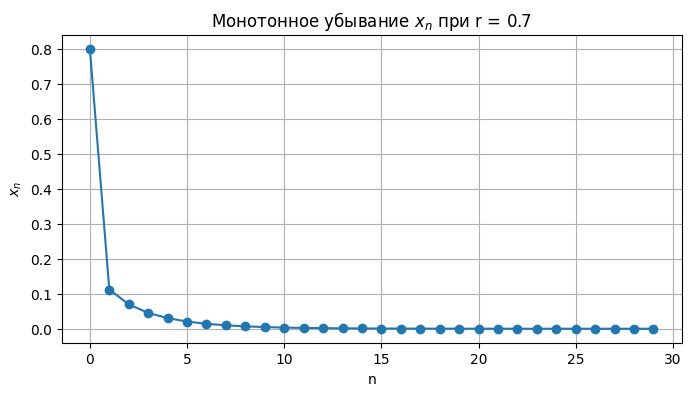

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x, r):
    return r * x * (1 - x)

r = 0.7
steps = 30
xs = [0.8]

for _ in range(1, steps):
    xs.append(logistic(xs[-1], r))

plt.figure(figsize=(8, 4))
plt.plot(range(steps), xs, marker='o')
plt.title(f"Монотонное убывание $x_n$ при r = {r}")
plt.xlabel("n")
plt.ylabel("$x_n$")
plt.grid(True)
plt.show()

## 4. Подпоследовательности $\{x_{2n}\}$ и $\{x_{2n+1}\}$ при $r \in (2,3)$

Пусть $r \in (2,3)$ и $x^* = \dfrac{r-1}{r}$ - неподвижная точка логистического отображения
$$
x_{n+1} = r\,x_n(1 - x_n).
$$

Из теории известно, что при $x_0 \in (0,1)$ и $r \in (1,3]$ верно:
$$
\lim_{n \to \infty} x_n = x^*.
$$

В условии нам дополнительно говорят, что:
$$
x_{2n} > x^*, \quad x_{2n+1} < x^*.
$$

То есть чётные элементы лежат **выше** $x^*$, а нечётные - **ниже**.

Рассмотрим разность $f(x) - x^*$, где $f(x) = r x(1 - x)$:
$$
f(x) - x^* = r x(1 - x) - r x^*(1 - x^*).
$$

Немного преобразуем:
$$
f(x) - x^*
= r\bigl[x - x^2 - x^* + (x^*)^2\bigr]
= r\bigl[(x - x^*) - (x^2 - (x^*)^2)\bigr]
= r(x - x^*)\bigl[1 - (x + x^*)\bigr].
$$

Отсюда видно две вещи:

1. **Знак отклонения меняется.**  
   Если $x > x^*$, то $x - x^* > 0$, но при $x \in (0,1)$ и $x^* \in (0,1)$ сумма $x + x^* > 1$, значит $1 - (x + x^*) < 0$.  
   Тогда $f(x) - x^* < 0$, то есть новое значение оказывается ниже $x^*$.  
   Аналогично, если $x < x^*$, то $f(x) - x^* > 0$ - новое значение выше $x^*$.

   Поэтому $x_n$ чередуются вокруг $x^*$: чётные сверху, нечётные снизу.

2. **Расстояние до $x^*$ уменьшается.**  
   Из формулы
   $$
   f(x) - x^* = r(x - x^*)\bigl[1 - (x + x^*)\bigr]
   $$
   видно, что
   $$
   |f(x) - x^*| = |x - x^*|\cdot |r(1 - (x + x^*))|.
   $$

   Для $x$ близких к $x^*$ можно заменить $x$ на $x^*$ в скобке:
   $$
   r(1 - (x + x^*)) \approx r(1 - 2x^*).
   $$

   Подставим $x^* = \dfrac{r-1}{r}$:
   $$
   1 - 2x^* = 1 - 2\frac{r-1}{r} = \frac{2 - r}{r},
   $$
   тогда
   $$
   r(1 - 2x^*) = 2 - r.
   $$

   При $r \in (2,3)$ число $2 - r$ отрицательно и по модулю меньше 1:
   $$
   -1 < 2 - r < 0 \quad \Rightarrow \quad |2 - r| < 1.
   $$

   Значит, в окрестности $x^*$ расстояние до точки уменьшается:
   $$
   |x_{n+1} - x^*| \approx |2 - r|\cdot |x_n - x^*|, \quad |2 - r| < 1.
   $$

   Это значит, что последовательность действительно "подтягивается" к $x^*$.

Теперь исходя из условий:
- чётные элементы $x_{2n}$ всегда лежат выше $x^*$ и становятся всё ближе к нему сверху, значит $\{x_{2n}\}$ монотонно убывает и сходится к $x^*$;
- нечётные элементы $x_{2n+1}$ лежат ниже $x^*$ и приближаются к нему снизу, значит $\{x_{2n+1}\}$ монотонно возрастает и тоже сходится к $x^*$.

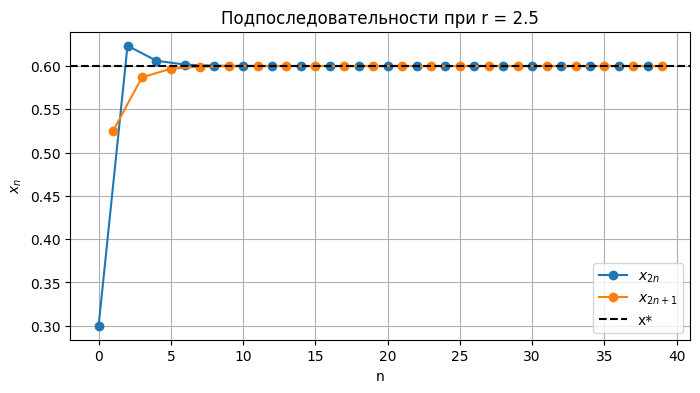

In [63]:
r = 2.5
steps = 40
xs = [0.3]

for _ in range(1, steps):
    xs.append(logistic(xs[-1], r))

even_indices = list(range(0, steps, 2))
odd_indices = list(range(1, steps, 2))
even = xs[::2]
odd = xs[1::2]
x_star = (r - 1) / r

plt.figure(figsize=(8, 4))
plt.plot(even_indices, even, 'o-', label="$x_{2n}$")
plt.plot(odd_indices, odd, 'o-', label="$x_{2n+1}$")
plt.axhline(x_star, color='black', linestyle='--', label="x*")
plt.xlabel("n")
plt.ylabel("$x_n$")
plt.title(f"Подпоследовательности при r = {r}")
plt.grid(True)
plt.legend()
plt.show()

## 5. Неподвижные точки отображения $g(x_n)$ (вариант $N = 0$)

Отображение варианта $N = 0$ имеет вид:
$$
x_{n+1} = r\,x_n(1 - x_n)(2 + x_n).
$$

Вводим обозначение
$$
g(x) = r\,x(1 - x)(2 + x),
$$
тогда
$$
x_{n+1} = g(x_n).
$$

Неподвижная точка $x^*$ удовлетворяет
$$
x^* = g(x^*) = r\,x^*(1 - x^*)(2 + x^*).
$$

Выносим $x^*$:
$$
x^* = 0
$$
— первая неподвижная точка.

Если $x^* \ne 0$, можно разделить на $x^*$ и получить:
$$
1 = r(1 - x^*)(2 + x^*).
$$

Это квадратное уравнение относительно $x^*$:
$$
1 = r(2 - x^* - (x^*)^2).
$$

Оно задаёт, при каких значениях $r$ и $x^*$ возможна вторая неподвижная точка.  
Для целей данной лабораторной достаточно аккуратно выписать это уравнение и отметить, что:
- всегда есть неподвижная точка $x^* = 0$;
- возможно появление ещё одной неподвижной точки как корня этого уравнения.

## 6. Диапазон параметра $r$, при котором $x_n$ монотонно сходится к нулю

Рассматриваем последовательность
$$
x_{n+1} = r\,x_n(1 - x_n)(2 + x_n), \quad 0 < x_n < 1.
$$

Внутренний множитель
$$
h(x) = (1 - x)(2 + x) = 2 - x - x^2
$$
на отрезке $[0,1]$ принимает значения от $0$ до $2$:
$$
0 \le h(x) \le 2.
$$

Тогда
$$
x_{n+1} = r\,x_n\,h(x_n) \le 2r\,x_n.
$$

Если взять $0 < r \le \dfrac{1}{2}$, то
$$
x_{n+1} \le 2r\,x_n \le x_n.
$$

При этом $x_{n+1} > 0$ (так как все множители положительны), поэтому $\{x_n\}$:

- остаётся положительной;
- ограничена снизу нулём;
- не возрастает, то есть является монотонно убывающей.

Следовательно, у неё есть предел
$$
\lim_{n \to \infty} x_n = L \ge 0.
$$

Подставляя предел в уравнение неподвижности
$$
L = r\,L(1 - L)(2 + L),
$$
видим, что $L = 0$ всегда является решением. Для малых $r$ именно к нулю и происходит сходимость.

**Вывод:** при $0 < r \le \dfrac{1}{2}$ последовательность, задаваемая отображением $g(x)$, монотонно убывает и сходится к нулю.
Это допустимая оценка диапазона параметра $r$, как и требуется в условии.

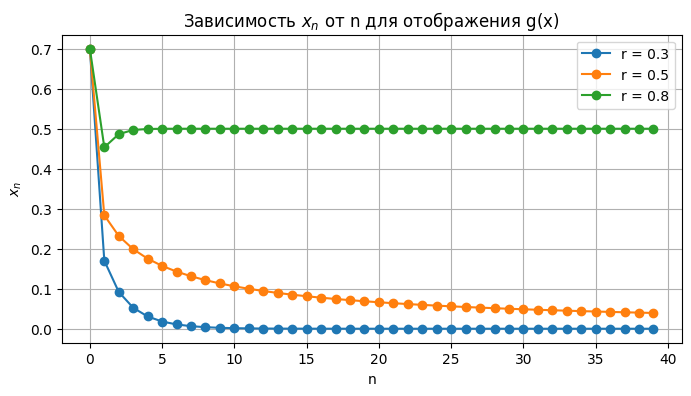

In [64]:
def g_my(x, r):
    return r * x * (1 - x) * (2 + x)

steps = 40
r_values_g = [0.3, 0.5, 0.8]
x0 = 0.7

plt.figure(figsize=(8, 4))

for r in r_values_g:
    xs = [x0]
    for _ in range(1, steps):
        xs.append(g_my(xs[-1], r))
    plt.plot(range(steps), xs, marker='o', label=f"r = {r}")

plt.title("Зависимость $x_n$ от n для отображения g(x)")
plt.xlabel("n")
plt.ylabel("$x_n$")
plt.grid(True)
plt.legend()
plt.show()

# Уровень Hard

Здесь я продолжаю исследовать динамику отображений:

- смотрю, как меняется длина цикла логистического отображения при $r \in (3, r_\infty)$, где $r_\infty \approx 3.5699456\dots$;
- строю лестницу Ламерея и по ней наблюдаю циклы;
- провожу аналогичный эксперимент для отображения моего варианта $g(x_n)$ и сравниваю его с классической логистикой. (N = 0)

## 1. Длина цикла логистического отображения при $r \in (3, r_\infty)$

Логистическое отображение:
$$
x_{n+1} = r\,x_n(1 - x_n).
$$

При $r \le 3$ траектория, как правило, приходит к неподвижной точке.  
Нас интересует диапазон
$$
3 < r < r_\infty, \quad r_\infty \approx 3.5699456\dots
$$
где начинают появляться циклы разных порядков.

Идея эксперимента:

1. Берём фиксированное начальное значение $x_0$ (например, $x_0 = 0.3$).
2. Для каждого параметра $r$ делаем много итераций, чтобы как-будто"забыть" начальное значение.
3. Потом записываем несколько последних значений $x_n$.
4. Округляем их и считаем количество различных значений. Это и будет оценка длины цикла $m$.
5. Строим график зависимости $m$ от $r$.

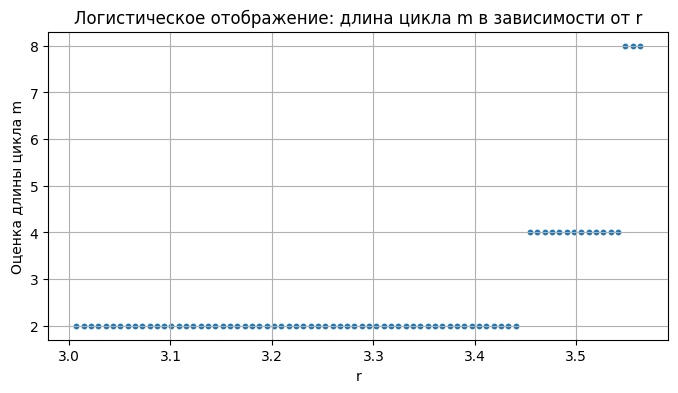

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x, r):
    return r * x * (1 - x)

def estimate_period_logistic(r, x0=0.3, n_skip=1000, n_take=200, round_digits=6):
    """
    Оценка длины цикла m для логистического отображения при заданном r.
    Метод: пропускаем первые n_skip значений, затем смотрим на уникальные
    x_n среди следующих n_take, с округлением.
    """
    x = x0

    for _ in range(n_skip):
        x = logistic(x, r)

    tail = []
    for _ in range(n_take):
        x = logistic(x, r)
        tail.append(x)

    rounded = [round(v, round_digits) for v in tail]
    uniq = sorted(set(rounded))
    m = len(uniq)

    if m > 50:
        return np.nan
    return m

r_inf = 3.5699456
r_values = np.linspace(3.0, r_inf, 80)
periods = [estimate_period_logistic(r) for r in r_values]

plt.figure(figsize=(8, 4))
plt.scatter(r_values, periods, s=10)
plt.xlabel("r")
plt.ylabel("Оценка длины цикла m")
plt.title("Логистическое отображение: длина цикла m в зависимости от r")
plt.grid(True)
plt.show()


### Вывод по длине цикла логистического отображения

По графику $m(r)$ видно, что при $r > 3$ длина цикла меняется ступенчато:

- сначала возникает цикл порядка $2$;
- затем появляются циклы порядка $4$, далее $8$, $16$ и так далее;
- участки по $r$, где длина цикла фиксирована, постепенно сужаются;
- ближе к $r_\infty$ оценки $m$ начинают сильно прыгать, что соответствует сложному (почти хаотическому) поведению.

Экспериментально видно, что длины циклов в основном принимают значения вида
$$
m = 2^k,\quad k = 1, 2, 3, \dots
$$
то есть циклы часто имеют порядок $2, 4, 8, 16, \dots$.
Именно эту закономерность и просили заметить в условии.

## 2. Лестница Ламерея для логистического отображения

Пусть $f(x) = r x(1 - x)$.

Лестница Ламерея строится так:

1. Берём начальную точку $x_0$ и стартуем из точки $(x_0, 0)$.
2. Идём вертикально до графика $y = f(x)$, получаем точку $(x_0, x_1)$, где $x_1 = f(x_0)$.
3. Из $(x_0, x_1)$ идём горизонтально до диагонали $y = x$ — это точка $(x_1, x_1)$.
4. Из $(x_1, x_1)$ снова идём вертикально до кривой $y = f(x)$ и получаем $(x_1, x_2)$.
5. Далее повторяем шаги 3–4 для последующих членов последовательности.

Так на графике получается "лестница", по которой можно наглядно увидеть, как ведут себя $x_n$.

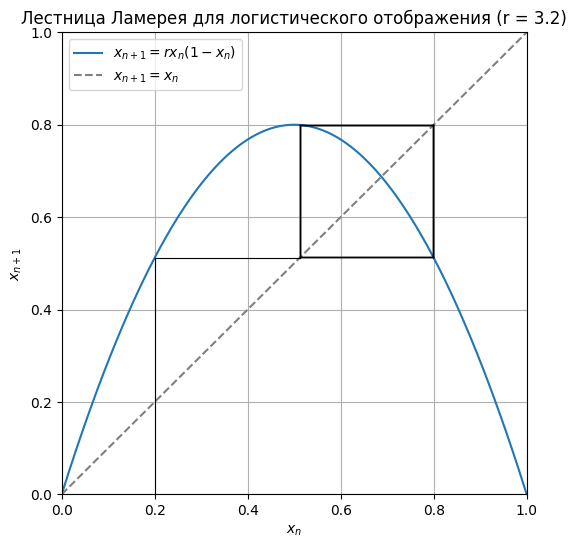

In [66]:
def cobweb_logistic(r, x0=0.3, n_steps=30, x_min=0.0, x_max=1.0):
    xs = np.linspace(x_min, x_max, 400)
    f_vals = logistic(xs, r)

    plt.figure(figsize=(6, 6))

    plt.plot(xs, f_vals, label="$x_{n+1} = r x_n (1 - x_n)$")
    plt.plot(xs, xs, '--', color='gray', label="$x_{n+1} = x_n$")

    x = x0
    y = 0.0
    f_val = logistic(x, r)

    plt.plot([x, x], [y, f_val], color='black', linewidth=0.8)
    plt.plot([x, f_val], [f_val, f_val], color='black', linewidth=0.8)

    x = f_val
    for _ in range(n_steps - 1):
        f_val = logistic(x, r)
        plt.plot([x, x], [x, f_val], color='black', linewidth=0.8)
        plt.plot([x, f_val], [f_val, f_val], color='black', linewidth=0.8)
        x = f_val

    plt.xlim(x_min, x_max)
    plt.ylim(x_min, x_max)
    plt.xlabel("$x_n$")
    plt.ylabel("$x_{n+1}$")
    plt.title(f"Лестница Ламерея для логистического отображения (r = {r})")
    plt.grid(True)
    plt.legend()
    plt.show()

cobweb_logistic(r=3.2, x0=0.2, n_steps=20)

### Вывод по лестнице Ламерея

По рисункам лестницы Ламерея можно заметить:

- если траектория приходит к неподвижной точке, ступеньки постепенно "закручиваются" и попадают в одну точку на диагонали $y = x$;
- если есть цикл порядка $2$, ступеньки прыгают между двумя точками: на рисунке получается замкнутый прямоугольник;
- при циклах более высокого порядка получается замкнутый многоугольник с большим числом вершин.

Такой рисунок хорошо показывает, есть ли цикл и какого он порядка.

## 3. Циклы отображения $g(x_n)$ для моего варианта (N = 0)

$$
x_{n+1} = g(x_n) = r\,x_n(1 - x_n)(2 + x_n).
$$

По условию Hard нужно:

1. посмотреть, как меняется длина цикла при изменении $r$;
2. построить соответствующие графики;
3. сравнить поведение с логистическим отображением.

Дальше действую по той же схеме, что и для логистики:

- фиксирую начальное значение $x_0$;
- для разных $r$ считаю длинную траекторию;
- анализирую хвост последовательности и по числу разных значений оцениваю длину цикла $m$;
- строю график $m(r)$.

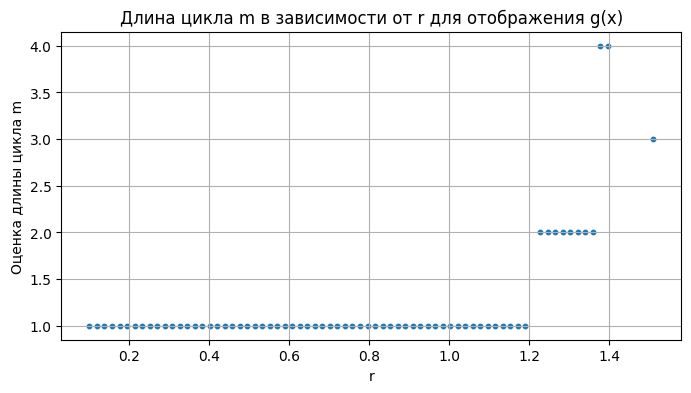

In [67]:
def g_variant(x, r):
    return r * x * (1 - x) * (2 + x)

def estimate_period_g(r, x0=0.3, n_skip=1000, n_take=200, round_digits=6):
    """
    Оценка длины цикла m для отображения g(x) при заданном r.
    """
    x = x0

    for _ in range(n_skip):
        x = g_variant(x, r)

    tail = []
    for _ in range(n_take):
        x = g_variant(x, r)
        tail.append(x)

    rounded = [round(v, round_digits) for v in tail]
    uniq = sorted(set(rounded))
    m = len(uniq)

    if m > 50:
        return np.nan
    return m

r_max_variant = 27 / (2 * (7 * np.sqrt(7) - 10))
r_values_g = np.linspace(0.1, r_max_variant, 80)
periods_g = [estimate_period_g(r) for r in r_values_g]

plt.figure(figsize=(8, 4))
plt.scatter(r_values_g, periods_g, s=10)
plt.xlabel("r")
plt.ylabel("Оценка длины цикла m")
plt.title("Длина цикла m в зависимости от r для отображения g(x)")
plt.grid(True)
plt.show()


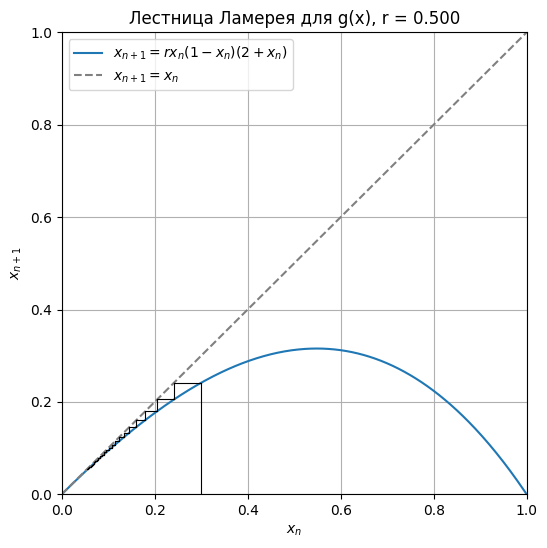

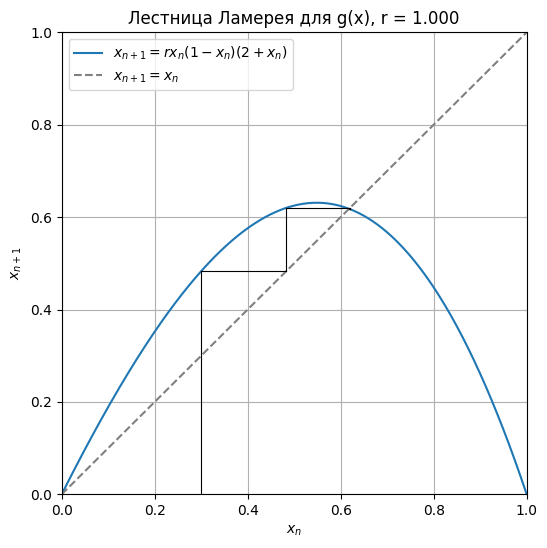

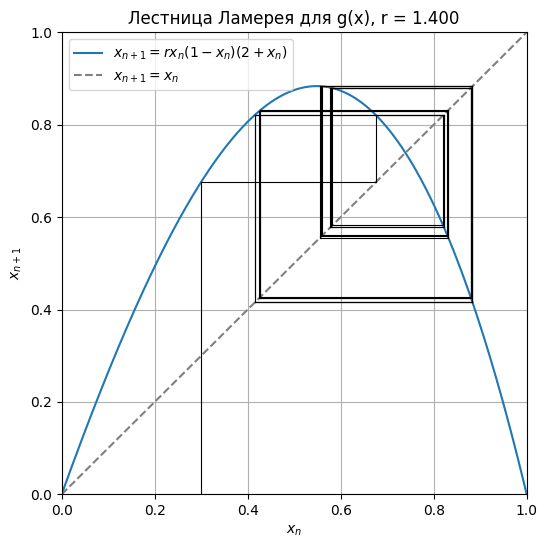

In [68]:
def cobweb_g(r, x0=0.3, n_steps=30, x_min=0.0, x_max=1.0):
    xs = np.linspace(x_min, x_max, 400)
    f_vals = g_variant(xs, r)

    plt.figure(figsize=(6, 6))
    plt.plot(xs, f_vals, label="$x_{n+1} = r x_n (1 - x_n)(2 + x_n)$")
    plt.plot(xs, xs, '--', color='gray', label="$x_{n+1} = x_n$")

    x = x0
    y = 0.0
    f_val = g_variant(x, r)

    plt.plot([x, x], [y, f_val], color='black', linewidth=0.8)
    plt.plot([x, f_val], [f_val, f_val], color='black', linewidth=0.8)
    x = f_val

    for _ in range(n_steps - 1):
        f_val = g_variant(x, r)
        plt.plot([x, x], [x, f_val], color='black', linewidth=0.8)
        plt.plot([x, f_val], [f_val, f_val], color='black', linewidth=0.8)
        x = f_val

    plt.xlim(x_min, x_max)
    plt.ylim(x_min, x_max)
    plt.xlabel("$x_n$")
    plt.ylabel("$x_{n+1}$")
    plt.title(f"Лестница Ламерея для g(x), r = {r:.3f}")
    plt.grid(True)
    plt.legend()
    plt.show()

for r in [0.5, 1.0, 1.4]:
    cobweb_g(r=r, x0=0.3, n_steps=25)

### ВЫВОДЫ для отображения $g(x)$ и сравнение с логистическим

Если смотреть на график $m(r)$ для $g(x)$ и на лестницы Ламерея, можно отметить:

- при малых $r$ траектория быстро затухает к неподвижной точке (обычно к нулю), то есть $m = 1$;
- при увеличении $r$ начинают появляться циклы большего порядка;
- длина цикла тоже меняется скачками, и заметны значения, которые совпадают с степенями двойки: $m = 2, 4, 8, \dots$;
- по мере роста $r$ интервалы, где порядок цикла постоянен, становятся короче, поведение становится более сложным.

В целом картинка похожа на логистическое отображение:

- в обоих случаях при росте $r$ происходит "наращивание" порядка циклов;
- наблюдается переход от устойчивой неподвижной точки к циклам и далее к более сложной динамике;
- качественно зависимость $m(r)$ ведёт себя сходным образом.

Отличия связаны с тем, что формула $g(x)$ содержит дополнительный множитель $(2 + x)$, а значит, другие конкретные границы по $r$ и немного другое расположение интервалов циклов.